In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [2]:
# read in randoms files

hdu0 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-0.fits')
# hdu1 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-1.fits')
# hdu2 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-2.fits')
# hdu3 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-3.fits')
# hdu4 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-  .fits')
# hdu5 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-  .fits')
# hdu6 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-  .fits')
# hdu7 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-7.fits')
# hdu8 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-  .fits')
# hdu9 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-  .fits')
# hdu10 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-10.fits')
# hdu11 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-11.fits')
# hdu12 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-  .fits')
# hdu13 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-  .fits')
# hdu14 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-  .fits')
# hdu15 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-15.fits')
# hdu16 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-  .fits')
# hdu17 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-  .fits')
# hdu18 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-  .fits')
# hdu19 = fits.open('/Users/mtownsend/anaconda/Data/randoms-1-  .fits')


data0 = hdu0[1].data
# data1 = hdu1[1].data
# data2 = hdu2[1].data
# data3 = hdu3[1].data
# data4 = hdu4[1].data
# data5 = hdu5[1].data
# data6 = hdu6[1].data
# data7 = hdu7[1].data
# data8 = hdu8[1].data
# data9 = hdu9[1].data
# data10 = hdu10[1].data
# data11 = hdu11[1].data
# data12 = hdu12[1].data
# data13 = hdu13[1].data
# data14 = hdu14[1].data
# data15 = hdu15[1].data
# data16 = hdu16[1].data
# data17 = hdu17[1].data
# data18 = hdu18[1].data
# data19 = hdu19[1].data

In [3]:
# create ra/dec arrays with only sources with relevant maskbits selected

ra0_all = []
dec0_ALL = []
ra0_ALL = data0.field('RA')
dec0_ALL = data0.field('DEC')

maskbits0_ALL = []
maskbits0_ALL = data0.field('maskbits')

hpixel0_ALL = []
hpixel0_ALL = data0.field('HPXPIXEL')


# ra1_all = []
# dec1_ALL = []
# ra1_ALL = data1.field('RA')
# dec1_ALL = data1.field('DEC')


# ra2_all = []
# dec2_ALL = []
# ra2_ALL = data2.field('RA')
# dec2_ALL = data2.field('DEC')


# ra3_all = []
# dec3_ALL = []
# ra3_ALL = data3.field('RA')
# dec3_ALL = data3.field('DEC')


# ra4_all = []
# dec4_ALL = []
# ra4_ALL = data4.field('RA')
# dec4_ALL = data4.field('DEC')


# ra5_all = []
# dec5_ALL = []
# ra5_ALL = data5.field('RA')
# dec5_ALL = data5.field('DEC')


# ra6_all = []
# dec6_ALL = []
# ra6_ALL = data6.field('RA')
# dec6_ALL = data6.field('DEC')


# ra7_all = []
# dec7_ALL = []
# ra7_ALL = data7.field('RA')
# dec7_ALL = data7.field('DEC')


# ra8_all = []
# dec8_ALL = []
# ra8_ALL = data8.field('RA')
# dec8_ALL = data8.field('DEC')


# ra9_all = []
# dec9_ALL = []
# ra9_ALL = data9.field('RA')
# dec9_ALL = data9.field('DEC')


# ra10_all = []
# dec10_ALL = []
# ra10_ALL = data10.field('RA')
# dec10_ALL = data10.field('DEC')


# ra11_all = []
# dec11_ALL = []
# ra11_ALL = data11.field('RA')
# dec11_ALL = data11.field('DEC')


# ra12_all = []
# dec12_ALL = []
# ra12_ALL = data12.field('RA')
# dec12_ALL = data12.field('DEC')


# ra13_all = []
# dec13_ALL = []
# ra13_ALL = data13.field('RA')
# dec13_ALL = data13.field('DEC')


# ra14_all = []
# dec14_ALL = []
# ra14_ALL = data14.field('RA')
# dec14_ALL = data14.field('DEC')


# ra15_all = []
# dec15_ALL = []
# ra15_ALL = data15.field('RA')
# dec15_ALL = data15.field('DEC')


# ra16_all = []
# dec16_ALL = []
# ra16_ALL = data16.field('RA')
# dec16_ALL = data16.field('DEC')


# ra17_all = []
# dec17_ALL = []
# ra17_ALL = data17.field('RA')
# dec17_ALL = data17.field('DEC')


# ra18_all = []
# dec18_ALL = []
# ra18_ALL = data18.field('RA')
# dec18_ALL = data18.field('DEC')


# ra19_all = []
# dec19_ALL = []
# ra19_ALL = data19.field('RA')
# dec19_ALL = data19.field('DEC')




In [15]:
CUT = ((ra0_ALL >= 241) & (ra0_ALL <= 246) & (dec0_ALL >= 6.5) & (dec0_ALL <= 11.5) & (((maskbits0_ALL & 2**1)!=0) | ((maskbits0_ALL & 2**11)!=0) | ((maskbits0_ALL & 2**12)!=0) | ((maskbits0_ALL & 2**13)!=0)))
# CUT = ((((maskbits0_ALL & 2**1)!=0) | ((maskbits0_ALL & 2**11)!=0) | ((maskbits0_ALL & 2**12)!=0) | ((maskbits0_ALL & 2**13)!=0)))
CUT_coords = ((ra0_ALL >= 241) & (ra0_ALL <= 246) & (dec0_ALL >= 6.5) & (dec0_ALL <= 11.5))

print(len(ra0_ALL[CUT]))
print(len(dec0_ALL[CUT]))

ra = ra0_ALL[CUT]
dec = dec0_ALL[CUT]
hpixel = hpixel0_ALL[CUT]
print(len(hpixel))

ra_ALL = ra0_ALL[CUT_coords]
dec_ALL = dec0_ALL[CUT_coords]

print(len(ra_ALL))


3912
3912
3912
61503


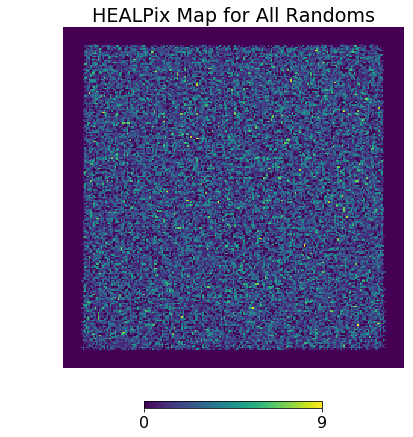

length phi:  61503
26344
61503


In [29]:
# make HEALPix map with every source

# Make HEALPix map using just RA/Dec; end up with a density plot
num = 1024*2

nside = num
# nside = 64
npixel = hp.nside2npix(nside)
# print(npixel)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra_ALL)):
    theta.append(np.radians(90. - dec_ALL[i]))
    phi.append(np.radians(ra_ALL[i]))
    
m = hp.ang2pix(nside, theta, phi)
map_ = np.bincount(m, minlength=npixel)
hp.gnomview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# hp.mollview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
plt.rcParams.update({'font.size':16})
plt.title('HEALPix Map for All Randoms')
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/22Jan2021/HEALPix-ALL2.jpg')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/22Jan2021/HEALPix-ALL.pdf')
plt.show()

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums = hp.ang2pix(nside, theta, phi, nest=True)
print(len(np.unique(pixnums)))
print(len(pixnums))
# print(hp.npix2nside(npixel))

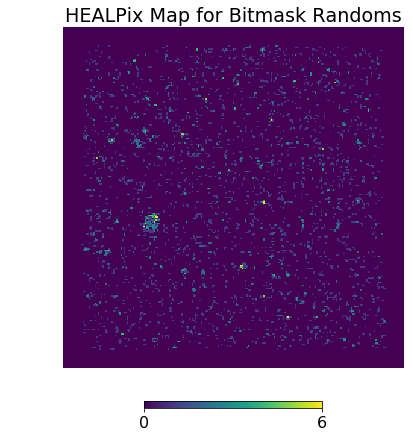

length phi:  3912
2951
3912


In [30]:
# make HEALPix map with only sources with relevant maskbits selected

# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024*2
# nside = 64
npixel = hp.nside2npix(nside)
# print(npixel)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra)):
    theta.append(np.radians(90. - dec[i]))
    phi.append(np.radians(ra[i]))
    
m = hp.ang2pix(nside, theta, phi)
map_ = np.bincount(m, minlength=npixel)
hp.gnomview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# hp.mollview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
plt.rcParams.update({'font.size':16})
plt.title('HEALPix Map for Bitmask Randoms')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/22Jan2021/HEALPix-bitmasks.jpg')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/22Jan2021/HEALPix-bitmasks.pdf')
plt.show()

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums_cut = hp.ang2pix(nside, theta, phi, nest=True)
print(len(np.unique(pixnums_cut)))
print(len(pixnums_cut))
# print(hp.npix2nside(npixel))

In [31]:
# calculate pixel area

pix_area = hp.nside2pixarea(nside, degrees=True)

print(pix_area)

# print(len(np.unique(hpixel)))
# print(len(hpixel))
# print(len(np.unique(hpixel0_ALL)))

print((len(pixnums_cut) / len(pixnums))*100.)

0.0008196227004015301
6.360665333398371


In [33]:
# calculate the area covered by maskbit sources

total_area = len(np.unique(pixnums)) * pix_area
area = len(np.unique(pixnums_cut)) * pix_area

print(area)
print(total_area)

print((area / total_area)*100.)


2.4187065888849153
21.59214041937791
11.20179167931977
28.8
